## 사이킷런 LinearRegression 을 이용한 보스턴 주택 가격 예측

[Various Linear Modules Supported by scikit-learn](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)<br><br>
__< LinearRegression 클래스 >__ 는 예측값과 실제 값의 RSS 를 최소화해 OLS ( Ordinary Least Squares ) 추정 방식으로 구현한 클래스.<br><br>
__< Input Parameter, Attributes>__ <br><br>
fit() 메서드로 X,y 배열을 입력 받으면, Regression coefficients 인 W 를 coef_ 속성에 저장한다.<br>
*Learning material* ⇒ [Scikit-learn 공식 문서](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)<br>

__< Multi-collinearity >__ <br>

[OLS](https://teddylee777.github.io/scikit-learn/linear-regression) 기반의 회귀 계수 계산은 입력 피처의 독립성에 많은 영향을 받는다. 피처 간의 상관 관계가 매우 높은 경우, 분산이 매우 커져서 오류에 매우 민감해 진다. 이 것을 다중 공선성 = multi-collinearity  라고 한다.<br>
일반적으로 상관 관계가 높은 피처가 많은 경우 독립적인 중요한 피처만 남기고 제거하거나 규제를 적용한다.<br>
만약 너무 많은 피처가 다중 공신성 문제를 가지고 있다면, PCA 를 통해 차원 축소를 고려해 보아야 한다.

__< Regression metrics >__ <br>

회귀의 평가를 위한 지표는 실제 값과 회귀 예측값의 차이 값을 기반으로 한 지표. <br>
실제 값과 예측 값의 차이를 그냥 더하면 예로 +3 -3 일 경우 합이 0이 될 수 있기 때문에 아래와 같은 지표들을 사용한다.<br><br>
*Learning material* ⇒ [Scikit-learn 공식 문서](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics) <br>
* 추가사항 : RMSE 라는 평가 지표는 따로 사이킷런에 구현이 안되어 있기 때문에 MSE 에 루트를 씌워서 사용한다.<br>
----
<u>cross_val_score 나 GridSearchCV 같은 Scroing 함수에 회귀 평가 지표를 적용 할 때 유의 할 점 한 가지가 있다.</u><br><br>
EX) MAE 를 지표로 사용한다면, mean_absoulte_error 가 아니라 neg_mean_absoulte_error 로 사용해야 한다. <br>
이유는 간단하다. sklearn 의 scoring 함수는 기본적으로 클 수록 좋은 평가 결과라 여겨진다. 하지만 실제 값과 예측 값의 오류 차이를 기반으로 하는 회귀 평가 지표의 경우에는 scoring 이 작을 수록 좋은 평가가 된다. <br>
즉, neg 를 붙여서 음수 처리를 해주어야 한다.<br>

*Learning material* ⇒ [Scikit-learn 공식 문서](https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules)<br>

###  보스턴 주택 가격 회귀 구현 

* Scikit-learn 내장 dataset load_boston() 이용
* 해당 dataset Feature 분석
    * p.306 참고

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
%matplotlib inline

boston = load_boston()

bostonDF = pd.DataFrame(boston.data,columns= boston.feature_names)
bostonDF['PRICE'] = boston.target
bostonDF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [2]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [4]:
bostonDF.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


모든 feature 가 non null 이며 float 형이므로 scaling 과 encoding 은 생략.<br>
이제 <span style="color:red"><b>각 feature 가 회귀 결과에 미치는 영향</b></span> 이 어느 정도인지 시각화 해서 알아보자.<br>
*Learning material* ⇒ [Seaborn 공식 문서 - regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot)<br>

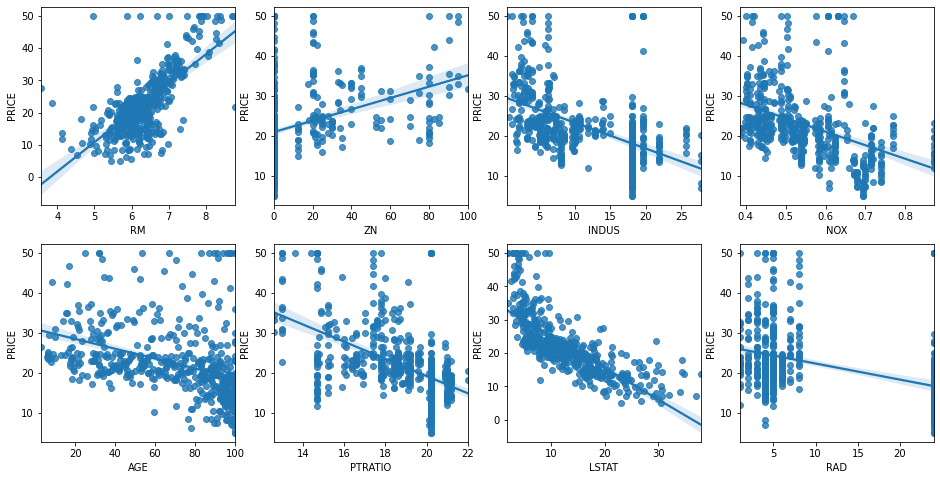

In [9]:
# matplotlib 의 subplots 는 여러 개의 그래프를 한번에 표현하기 위해 자주 사용 
# ncols/nrows 열/행 방향 으로 위치 할 그래프의 개수 , 
fig, axs = plt.subplots(figsize=(16,8), ncols=4,nrows=2)
lm_feature = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']

for i,feature in enumerate(lm_feature):
    row = int(i/4)
    col = i%4
    
    # regplot : X,Y 축 값의 산점도와 함께 선형 회귀 직선을 그려줌 
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

해당 그래프를 보면 ,<br>
RM feature 은 양 방향의 선형성 = Positive Linearity 가 가장 크고, LSTAT 는 Negative Linearity 가 가장 큰 것을 알 수 있다.<br><br>
이제 LinearRegression 을 이용해서 직접 회귀 모델을 만들어보자.<br>
Regression metrics 는 Mean Square error 와 R2 score 를 사용한다.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

y_label = bostonDF['PRICE']
X_feature = bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train,X_test,y_train,y_test = train_test_split(X_feature,y_label,test_size=0.3,random_state=156)

# 선형 회귀 OLS 로 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

print("MSE : {0:.4f}, RMSE: {1:.4f}".format(MSE,RMSE))
print("R2 score : {0:.4f}".format(r2_score(y_test,y_pred)))

MSE : 17.2969, RMSE: 4.1590
R2 score : 0.7572


이번에는 LinearRegression 객체의 attributes 중 하나인  intercept_ = 절편 , coef_ = 회귀 계수 를 확인해보자.

In [14]:
print('절편 값: ',lr.intercept_)
print('회귀계수 값: ',lr.coef_) # label 을 제외한 feature 의 갯수 만큼 → ω  

절편 값:  40.995595172164705
회귀계수 값:  [-1.12979614e-01  6.55124002e-02  3.44366694e-02  3.04589777e+00
 -1.97958320e+01  3.35496880e+00  5.93713290e-03 -1.74185354e+00
  3.55884364e-01 -1.42954516e-02 -9.20180066e-01  1.03966156e-02
 -5.66182106e-01]


각 회귀 계수 값들을 feature 에 매핑하고 높은 순으로 출력

In [18]:
coeff = pd.Series(data=np.round(lr.coef_,1),index=X_feature.columns)
coeff.sort_values(ascending=False,inplace=True)
coeff

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

RM = 거주 할 수 있는 방의 갯수 가 양의 값으로 회귀 계수가 가장 크며, NOX = 일산화질소 농도 의 경우 회귀 계수가 음으로 이상할 만큼 크다는 것을 파악 할 수 있다.<br><br>
마지막으로 , cross_val_score 를 이용하여 교차 검증을 통해 기존에 썼던 평가 지표를 측정해 보자. <br>
각 fold 마다 평가 지표 값을 배열 형태로 출력 시켰다.

In [24]:
from sklearn.model_selection import cross_val_score

y_label = bostonDF['PRICE']
X_feature = bostonDF.drop(['PRICE'],axis=1,inplace=False)

lr = LinearRegression()

# cv 폴드 수 만큼의 평가 지표 값을 배열로 반환 
neg_mse_score = cross_val_score(lr,X_feature,y_label,scoring="neg_mean_squared_error",cv=5)
rmse_score = np.sqrt(neg_mse_score*(-1))

print('5 folds 의 개별 Negative MSE score: ',np.round(neg_mse_score,2))
print('5 folds 의 개별 RMSE score: ',np.round(rmse_score,2))


5 folds 의 개별 Negative MSE score:  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds 의 개별 RMSE score:  [3.53 5.1  5.75 8.99 5.77]


앞에서 설명 했듯이, 회귀에서 평가 지표는 작을 수록 좋은 모델이지만, scoring 은 큰 값을 좋은 모델이라는 기준이 탑재 되어있어서<br> 모든 값에 (-) 를 취해주어야 한다.